# 模型选择、欠拟合和过拟合

在前几节介绍的数据挖掘与机器学习算法中，大家可能发现一个问题：当模型在训练数据集上更准确时，它在测试数据集上却不一定更准确，比如一个同学用了1000篇文章去训练文本分类，训练集上的准确率达到99%，可是测试集上却只有20-30%。这是为什么呢？

首先，我们要回归到机器学习最基本的概念上来分析。

## 训练误差和泛化误差

在解释上述现象之前，我们需要区分`训练误差（training error）`和`泛化误差（generalization error）`。通俗来讲，前者指模型在训练数据集上表现出的误差，后者指模型在任意一个测试数据样本上表现出的误差的期望，并常常通过测试数据集上的误差来近似。计算训练误差和泛化误差可以使用之前介绍过的损失函数，例如线性回归用到的平方损失函数和Logistic回归用到的交叉熵损失函数。

让我们以高考为例来直观地解释训练误差和泛化误差这两个概念。训练误差可以认为是做往年高考试题（训练题）时的错误率，泛化误差则可以通过真正参加高考（测试题）时的答题错误率来近似。假设训练题和测试题都随机采样于一个未知的依照相同考纲的巨大试题库。如果让一名未学习中学知识的小学生去答题，那么测试题和训练题的答题错误率可能很相近。但如果换成一名反复练习训练题的高三备考生答题，即使在训练题上做到了错误率为0，也不代表真实的高考成绩会如此。

在机器学习里，我们通常假设训练数据集（训练题）和测试数据集（测试题）里的每一个样本都是从同一个概率分布中相互独立地生成的(这是一个非常重要的假设)。基于该独立同分布假设，给定任意一个机器学习模型（含参数），它的训练误差的期望和泛化误差都是一样的。例如，如果我们将模型参数设成随机值（小学生），那么训练误差和泛化误差会非常相近。但我们从前面几节中的算法已经了解到，模型的参数是通过在训练数据集上训练模型而学习出的，参数的选择依据了最小化训练误差（高三备考生）。所以，训练误差的期望小于或等于泛化误差。也就是说，一般情况下，由训练数据集学到的模型参数会使模型在训练数据集上的表现优于或等于在测试数据集上的表现。由于无法从训练误差估计泛化误差，一味地降低训练误差并不意味着泛化误差一定会降低。

机器学习模型应关注降低泛化误差。既要降低训练误差，也要降低测试误差。


## 模型选择(Model Selection)

在机器学习中，通常需要评估若干候选模型的表现并从中选择模型。这一过程称为`模型选择（model selection）`。可供选择的候选模型可以是有着不同超参数的同类模型。以决策树为例，我们可以选择树的层数等。为了得到有效的模型，我们通常要在模型选择上下一番功夫。下面，我们来描述模型选择中经常使用的验证数据集（validation data set）。


### 验证数据集

从严格意义上讲，测试集只能在所有超参数和模型参数选定后使用一次。不可以使用测试数据选择模型，如调参。由于无法从训练误差估计泛化误差，因此也不应只依赖训练数据选择模型。鉴于此，我们可以预留一部分在训练数据集和测试数据集以外的数据来进行模型选择。这部分数据被称为`验证数据集`，简称`验证集（validation set）`。例如，我们可以从给定的训练集中随机选取一小部分作为验证集，而将剩余部分作为真正的训练集。

然而在实际应用中，由于数据不容易获取，测试数据极少只使用一次就丢弃。因此，实践中验证数据集和测试数据集的界限可能比较模糊。从严格意义上讲，除非明确说明，否则实验所使用的测试集应为验证集，实验报告的测试结果（如测试准确率）应为验证结果（如验证准确率）。


### $K$ 折交叉验证

由于验证数据集不参与模型训练，当训练数据不够用时，预留大量的验证数据显得太奢侈。一种改善的方法是$K$折交叉验证（$K$-fold cross-validation）。在$K$折交叉验证中，我们把原始训练数据集分割成$K$个不重合的子数据集，然后我们做$K$次模型训练和验证。每一次，我们使用一个子数据集验证模型，并使用其他$K-1$个子数据集来训练模型。在这$K$次训练和验证中，每次用来验证模型的子数据集都不同。最后，我们对这$K$次训练误差和验证误差分别求平均。



## 欠拟合和过拟合

我们讨论模型训练中经常出现的两类典型问题：一类是模型无法得到较低的训练误差，我们将这一现象称作`欠拟合（underfitting）`；另一类是模型的训练误差远小于它在测试数据集上的误差，我们称该现象为`过拟合（overfitting）`。在实践中，我们要尽可能同时应对欠拟合和过拟合。虽然有很多因素可能导致这两种拟合问题，在这里我们重点讨论两个因素：模型复杂度和训练数据集大小。


### 模型复杂度

为了解释模型复杂度，我们以多项式函数拟合为例。给定一个由标量数据特征$x$和对应的标量标签$y$组成的训练数据集，多项式函数拟合的目标是找一个$K$阶多项式函数

$$\hat{y} = b + \sum_{k=1}^K x^k w_k$$

来近似$y$。在上式中，$w_k$是模型的权重参数，$b$是偏差参数。与线性回归相同，多项式函数拟合也使用平方损失函数。特别地，一阶多项式函数拟合又叫线性函数拟合。

因为高阶多项式函数模型参数更多，模型函数的选择空间更大，所以高阶多项式函数比低阶多项式函数的复杂度更高。因此，高阶多项式函数比低阶多项式函数更容易在相同的训练数据集上得到更低的训练误差。给定训练数据集，模型复杂度和误差之间的关系通常如下图所示。给定训练数据集，如果模型的复杂度过低，很容易出现欠拟合；如果模型复杂度过高，很容易出现过拟合。应对欠拟合和过拟合的一个办法是针对数据集选择合适复杂度的模型。


![模型复杂度对欠拟合和过拟合的影响](img/capacity_vs_error.svg)


### 训练数据集大小

影响欠拟合和过拟合的另一个重要因素是训练数据集的大小。一般来说，如果训练数据集中样本数过少，特别是比模型参数数量（按元素计）更少时，过拟合更容易发生。此外，泛化误差不会随训练数据集里样本数量增加而增大。因此，在计算资源允许的范围之内，我们通常希望训练数据集大一些，特别是在模型复杂度较高时，例如层数较多的深度学习模型。

## 示例

In [145]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
# 导入多项式特征生成器
from sklearn.preprocessing import PolynomialFeatures

In [146]:
# 样本的训练数据，特征和目标值
x_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]

### 线性函数拟合（欠拟合）

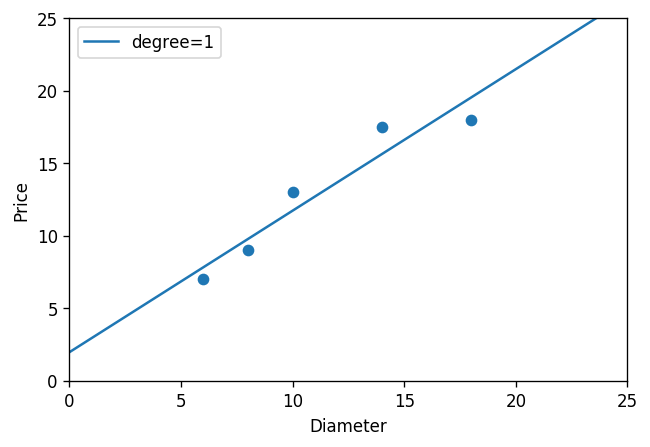

一次线性模型在预测集合上得分： 0.9100015964240102


In [147]:
# 一次线性回归的学习与预测
# 线性回归模型学习
regressor = LinearRegression()
regressor.fit(x_train, y_train)
# 画出一次线性回归的拟合曲线
xx = np.linspace(0, 25, 100)   # 0到16均匀采集100个点做x轴
xx = xx.reshape(xx.shape[0], 1)
yy = regressor.predict(xx)  # 计算每个点对应的y
plt.scatter(x_train, y_train)   # 画出训练数据的点
plt1, = plt.plot(xx, yy, label="degree=1")
plt.axis([0, 25, 0, 25])
plt.xlabel("Diameter")
plt.ylabel("Price")
plt.legend(handles=[plt1])
plt.show()
# 输出在样本上的预测评分
print("一次线性模型在预测集合上得分：", regressor.score(x_train, y_train))

### 二阶多项式函数拟合（正常）

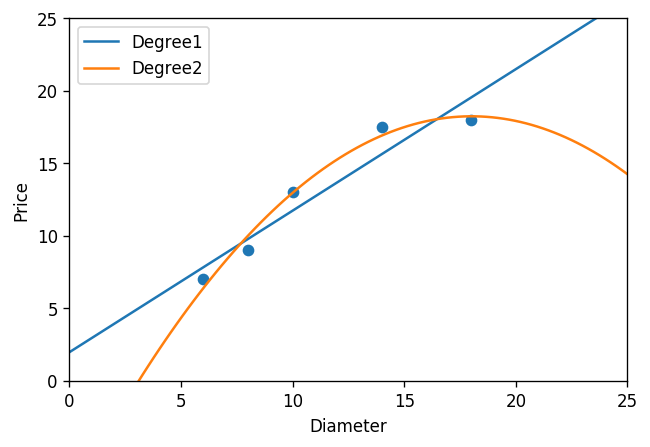

二次线性模型在预测集合上得分: 0.9816421639597427


In [148]:
# 2次线性回归进行预测
poly2 = PolynomialFeatures(degree=2)    # 2次多项式特征生成器
x_train_poly2 = poly2.fit_transform(x_train)
# 建立模型预测
regressor_poly2 = LinearRegression()
regressor_poly2.fit(x_train_poly2, y_train)
# 画出2次线性回归的图
xx_poly2 = poly2.transform(xx)
yy_poly2 = regressor_poly2.predict(xx_poly2)
plt.scatter(x_train, y_train)
plt1, = plt.plot(xx, yy, label="Degree1")
plt2, = plt.plot(xx, yy_poly2, label="Degree2")
plt.axis([0, 25, 0, 25])
plt.xlabel("Diameter")
plt.ylabel("Price")
plt.legend(handles=[plt1, plt2])
plt.show()
# 输出二次回归模型的预测样本评分
print("二次线性模型在预测集合上得分:", regressor_poly2.score(x_train_poly2, y_train)) 

### 四阶多项式拟合（过拟合）

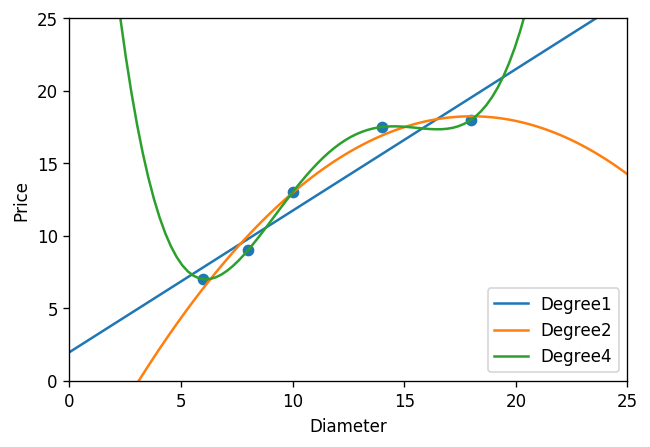

四次线性模型在预测集合上得分: 1.0


In [149]:
# 进行四次线性回归模型拟合
poly4 = PolynomialFeatures(degree=4)    # 4次多项式特征生成器
x_train_poly4 = poly4.fit_transform(x_train)
# 建立模型预测
regressor_poly4 = LinearRegression()
regressor_poly4.fit(x_train_poly4, y_train)
# 画出2次线性回归的图
xx_poly4 = poly4.transform(xx)
yy_poly4 = regressor_poly4.predict(xx_poly4)
plt.scatter(x_train, y_train)
plt1, = plt.plot(xx, yy, label="Degree1")
plt2, = plt.plot(xx, yy_poly2, label="Degree2")
plt4, = plt.plot(xx, yy_poly4, label="Degree4")
plt.axis([0, 25, 0, 25])
plt.xlabel("Diameter")
plt.ylabel("Price")
plt.legend(handles=[plt1, plt2, plt4])
plt.show()
# 输出二次回归模型的预测样本评分
print("四次线性模型在预测集合上得分:", regressor_poly4.score(x_train_poly4, y_train)) 

In [150]:
# 准备测试数据
x_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]
print("一次线性模型在测试集合上得分:", regressor.score(x_test, y_test))
x_test_poly2 = poly2.transform(x_test)
print("二次线性模型在测试集合上得分:", regressor_poly2.score(x_test_poly2, y_test))
x_test_poly4 = poly4.transform(x_test)
print("四次线性模型在测试集合上得分:", regressor_poly4.score(x_test_poly4, y_test))

一次线性模型在测试集合上得分: 0.809726797707665
二次线性模型在测试集合上得分: 0.8675443656345054
四次线性模型在测试集合上得分: 0.8095880795782215


## 正则化——处理过拟合的一种方法

## 高维线性回归

我们使用高维线性回归为例来引入一个过拟合问题。


具体来说我们使用如下的线性函数来生成每一个数据样本

$$y = 0.05 + \sum_{i = 1}^p 0.01x_i +  \text{noise}$$

这里噪音服从均值0和标准差为0.01的正态分布。

需要注意的是，我们用以上相同的数据生成函数来生成训练数据集和测试数据集。为了观察过拟合，我们特意把训练数据样本数设低，例如$n=20$，同时把维度升高，例如$p=200$。

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

num_train = 20
num_test = 100
num_inputs = 200

## 生成数据集


这里定义模型真实参数。

In [152]:
true_theta = np.ones((num_inputs, 1)) * 0.01
true_theta0 = 0.05

生成数据集

In [153]:
X = np.random.randn(num_train + num_test, num_inputs)
y = np.dot(X, true_theta) + true_theta0
y += .01 * np.random.randn(num_train + num_test,1)

X_train, X_test = X[:num_train, :], X[num_train:, :]
y_train, y_test = y[:num_train], y[num_train:]

当我们开始训时候，我们需要不断读取数据块。这里我们定义一个函数它每次返回`batch_size`个随机的样本和对应的目标。我们通过python的`yield`来构造一个迭代器。

In [154]:
import random
batch_size = 1
def data_iter(num_examples):
    idx = list(range(num_examples))
    random.shuffle(idx)
    for i in range(0, num_examples, batch_size):
        j = idx[i:min(i+batch_size,num_examples)]
        yield X[j], y[j]

## 初始化模型参数

下面我们随机初始化模型参数。之后训练时我们需要对这些参数求导来更新它们的值，所以我们需要创建它们的梯度。

In [155]:
def init_params():
    w = np.random.randn(num_inputs,1)
    b = np.zeros(shape=(1,1))
    params = [w, b]
    return params

In [156]:
params = init_params()

In [157]:
params[0].shape

(200, 1)

## $L_2$范数正则化

这里我们引入$L_2$范数正则化。不同于在训练时仅仅最小化损失函数(Loss)，我们在训练时其实在最小化

$$\text{loss} + \lambda \sum_{\theta \in \textrm{params}}\|\theta\|_2^2。$$

直观上，$L_2$范数正则化试图惩罚较大绝对值的参数值。下面我们定义L2正则化。注意有些时候大家对偏移加罚，有时候不加罚。通常结果上两者区别不大。这里我们演示对偏移也加罚的情况：

In [158]:
def L2_penalty(theta, theta0):
    return ((theta**2).sum() + theta0**2) / 2

## 定义训练和测试

下面我们定义剩下的所需要的函数。这个跟之前的教程大致一样。

In [159]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import matplotlib.pyplot as plt
import numpy as np

def net(X, theta, theta0):  
    return np.dot(X, theta) + theta0

def square_loss(yhat, y):
    return (yhat - y.reshape(yhat.shape)) ** 2 / 2

def sgd(params, grads, lr, batch_size,lambd):
    for (param,grad) in zip(params,grads):
        grad = grad.reshape(param.shape)
        param[:] = (1 - lr*lambd/batch_size) * param - lr * grad / batch_size
        
        
def test(net, params, X, y):
    return square_loss(net(X, *params), y).mean()

def train(lambd):
    epochs = 10
    learning_rate = 0.005
    theta, theta0 = params = init_params()
    train_loss = []
    test_loss = []
    for e in range(epochs):        
        for data, label in data_iter(num_train):
            output = net(data, *params)
            #loss = square_loss(output, label) + lambd * L2_penalty(*params)
            grad = np.sum((output-label) * data, axis = 0)
            grads = [grad, np.sum((output-label), axis = 0)]
            sgd(params,grads,learning_rate, batch_size,lambd)
        train_loss.append(test(net, params, X_train, y_train))
        test_loss.append(test(net, params, X_test, y_test))
    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.legend(['train', 'test'])
    plt.show()
    return 'learned theta[:10]:', theta[:10].T, 'learned theta0:', theta0

## 观察过拟合

接下来我们训练并测试我们的高维线性回归模型。注意这时我们并未使用正则化。

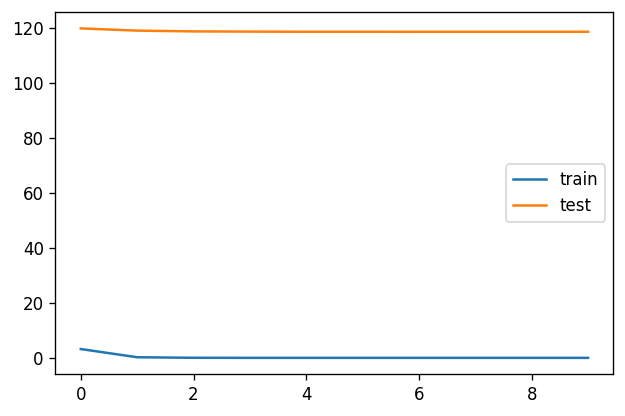

('learned theta[:10]:',
 array([[-0.26992777, -1.01726945,  0.39313877, -0.76563486, -0.40746692,
          0.84757889, -1.11901969,  0.24366609, -2.41561495, -1.69961351]]),
 'learned theta0:',
 array([[-0.15439307]]))

In [160]:
train(0)

即便训练误差可以达到0.000000，但是测试数据集上的误差很高。这是典型的过拟合现象。

观察学习的参数。事实上，大部分学到的参数的绝对值比真实参数的绝对值要大一些。


## 使用正则化

下面我们重新初始化模型参数并设置一个正则化参数。

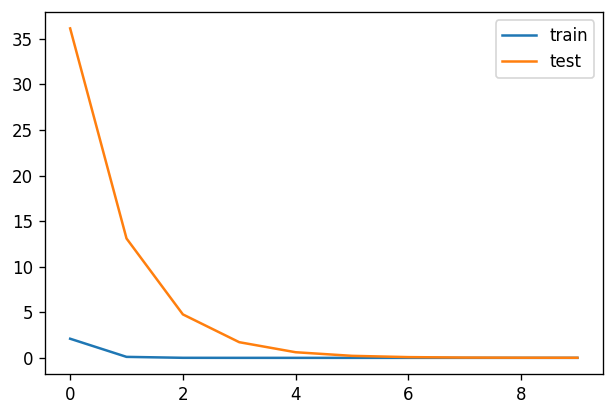

('learned theta[:10]:',
 array([[-0.00430653,  0.00621962, -0.00766532,  0.01073691, -0.00597369,
          0.00780515, -0.00472885, -0.00735603, -0.00452238,  0.00332442]]),
 'learned theta0:',
 array([[0.0048842]]))

In [161]:
train(5)

我们发现训练误差虽然有所提高，但测试数据集上的误差有所下降。过拟合现象得到缓解。但打印出的学到的参数依然不是很理想，这主要是因为我们训练数据的样本相对维度来说太少。

## 结论

* 我们可以使用正则化来应对过拟合问题。

## 练习

* 除了正则化、增大训练量、以及使用合适的模型，你觉得还有哪些办法可以应对过拟合现象？
* 如果你了解贝叶斯统计，你觉得$L_2$范数正则化对应贝叶斯统计里的哪个重要概念？